In [ ]:
# Team 3
# Anirban Mukherjee
# Manjusha Chava
# Tae Hyun Je  
# 11/11/2020

In [3]:
# importing comms libraries
import numpy as np
import scipy as spy
import scipy.interpolate
import matplotlib.pyplot as plt
import math
import wave
from scipy.io import wavfile


In [4]:
# Define parameters for Project3
L = 100  # Length of the overall transmission
N = 10   # Pulse duration for rectangular pulse train
M = 10   # Upsampling factor for generating analog waveform
L_lc = 20 # Line coding pulse duration

In [5]:
# Matlab's interp function
def interpolate_1d_vector(vector, factor):
    """
    Interpolate, i.e. upsample, a given 1D vector by a specific interpolation factor.
    :param vector: 1D data vector
    :param factor: factor for interpolation (must be integer)
    :return: interpolated 1D vector by a given factor
    """
    x = np.arange(np.size(vector))
    y = vector
    f = scipy.interpolate.interp1d(x, y, kind='cubic')

    x_extended_by_factor = np.linspace(x[0], x[-1], np.size(x) * factor)
    y_interpolated = np.zeros(np.size(x_extended_by_factor))

    i = 0
    for x in x_extended_by_factor:
        y_interpolated[i] = f(x)
        i += 1

    return y_interpolated

In [6]:
# Matlab's quantiz function
def quantize(signal, partitions, codebook):
    indices = []
    quanta = []
    for datum in signal:
        index = 0
        while index < len(partitions) and datum > partitions[index]:
            index += 1
        indices.append(index)
        quanta.append(codebook[index])
    return indices, quanta

# Question 1: Generating Analog Cosine Waveforms

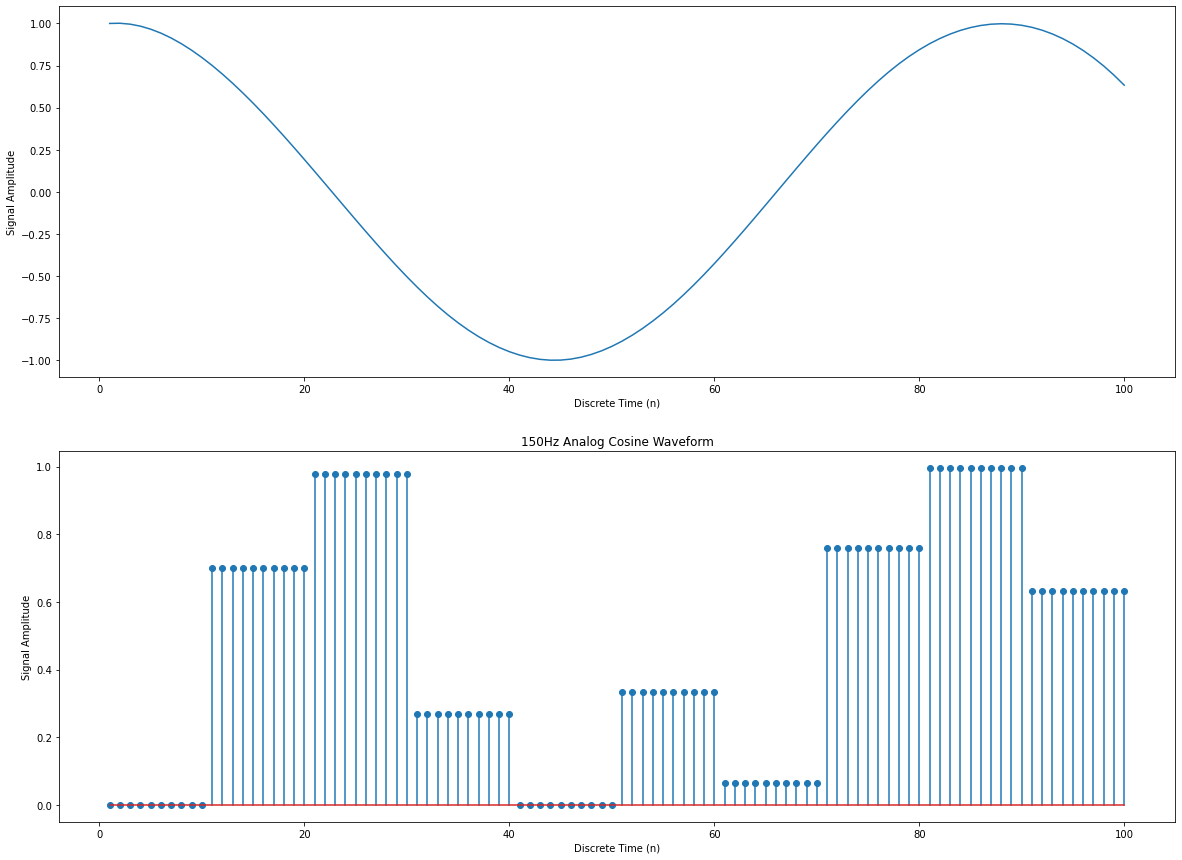

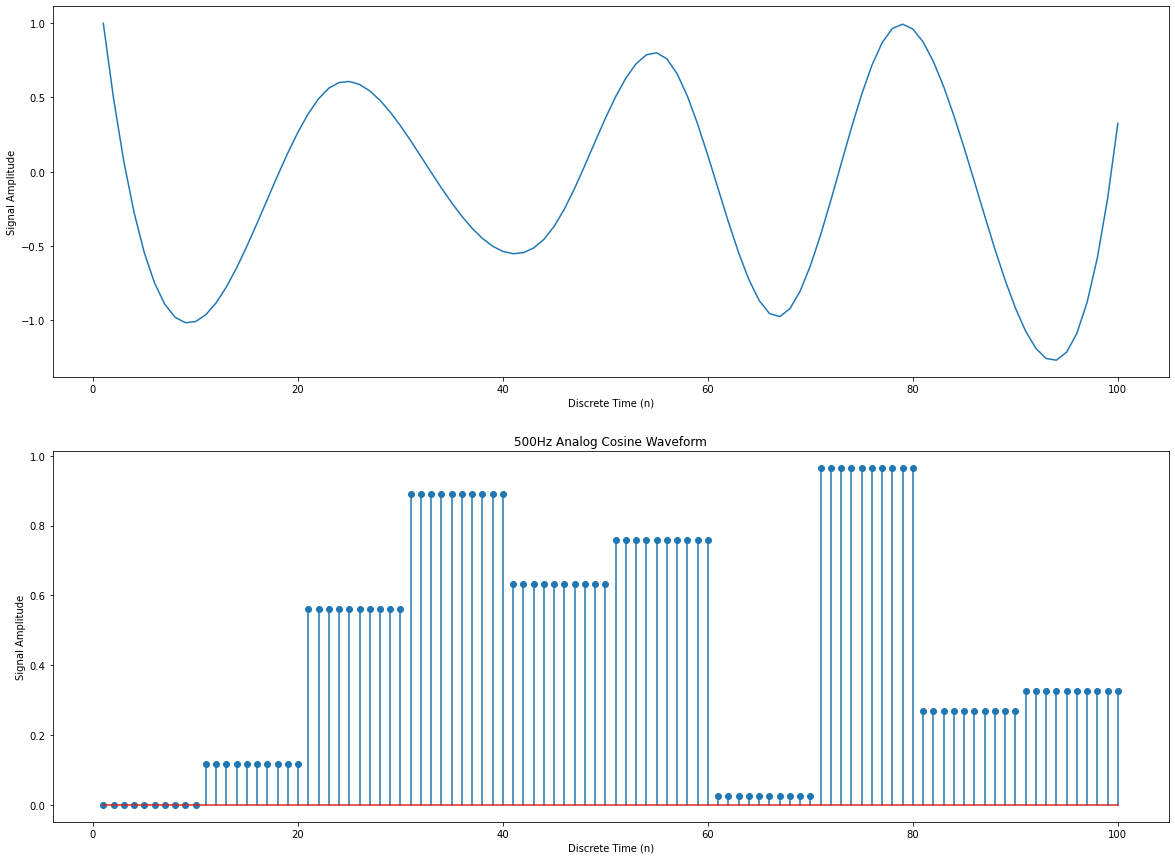

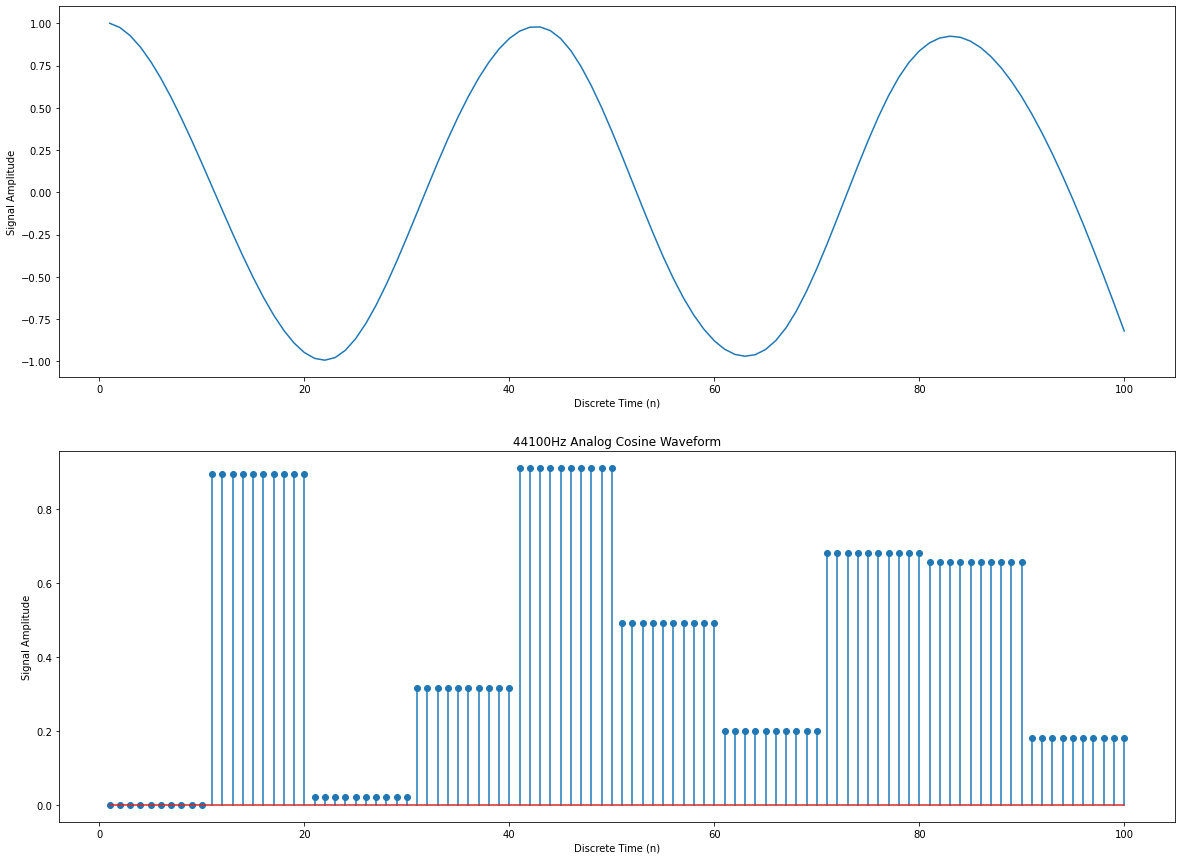

In [7]:
# Question 1
freq1 = 150
freq2 = 500
freq3 = 44100
cos1 = []
cos2 = []
cos3 = []

# Generate 1D cosine arrays for each freqency 
for i in range(N): 
 cos1.append(np.cos(freq1 * i))
 cos2.append(np.cos(freq2 * i))
 cos3.append(np.cos(freq3 * i))

# Interpolate the cosine arrays into 1D vectors
analog_wavefm_150 = interpolate_1d_vector(cos1,N) 
analog_wavefm_500 = interpolate_1d_vector(cos2,N) 
analog_wavefm_44100 = interpolate_1d_vector(cos3,N) 

# Generate a rectangular pulse train of samples
impulsetrain_wavefm = np.reshape(np.ones((N,1))*np.remainder(cos1,1),(1,L), order='F')
impulsetrain_wavefm_500 = np.reshape(np.ones((N,1))*np.remainder(cos2,1),(1,L), order='F')
impulsetrain_wavefm_44100 = np.reshape(np.ones((N,1))*np.remainder(cos3,1),(1,L), order='F')

# Visualize analog cosine at 150 Hz
plt.figure(figsize=(20, 15))
plt.subplot(211)
plt.plot(np.arange(1,L+1),analog_wavefm_150)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.subplot(212)
plt.stem(np.arange(1,L+1),impulsetrain_wavefm.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.title('150Hz Analog Cosine Waveform')
plt.show()

# Visualize analog cosine at 500 Hz
plt.figure(figsize=(20, 15))
plt.subplot(211)
plt.plot(np.arange(1,L+1),analog_wavefm_500)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.subplot(212)
plt.stem(np.arange(1,L+1),impulsetrain_wavefm_500.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.title('500Hz Analog Cosine Waveform')
plt.show()

# Visualize analog cosine at 44100 Hz
plt.figure(figsize=(20, 15))
plt.subplot(211)
plt.plot(np.arange(1,L+1),analog_wavefm_44100)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.subplot(212)
plt.stem(np.arange(1,L+1),impulsetrain_wavefm_44100.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.title('44100Hz Analog Cosine Waveform')
plt.show()

# Question 2: Pulse Amplitude Modulation 

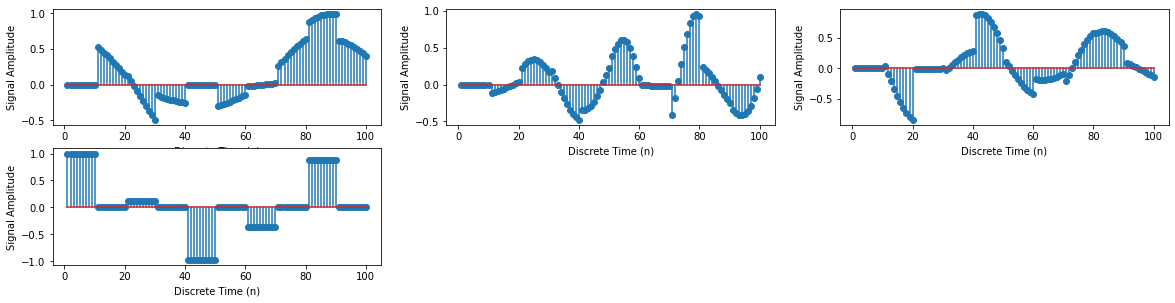

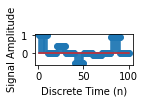

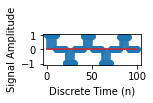

In [8]:
# Question 2
# Pulse Amplitude Modulation 


# Natural Sampling PAM
nspam_wavefm_150 = np.multiply(impulsetrain_wavefm, analog_wavefm_150).T

nspam_wavefm_500 = np.multiply(impulsetrain_wavefm_500, analog_wavefm_500).T

nspam_wavefm_44100 = np.multiply(impulsetrain_wavefm_44100, analog_wavefm_44100).T

# Flat-Top PAM

# downsampling
temp1 = analog_wavefm_150[0::2*N]
temp_500_1 = analog_wavefm_500[0::2*N]
temp_44100_1 = analog_wavefm_44100[0::2*N]

# variables for upsampling
temp2 = (int)(N/2)
temp3 = N

# upsampling for 150 Hz
temp = np.zeros((temp3,))
temp[::2] = temp1

# upsampling for 500 Hz
temp_500 = np.zeros((temp3,))
temp_500[::2] = temp_500_1

# upsampling for 44100 Hz
temp_44100 = np.zeros((temp3,))
temp_44100[::2] = temp_44100_1

# pam_wavefm for 150 Hz
ftpam_wavefm = np.reshape(np.ones((N,1))*temp,(1,L), order='F')

# pam_wavefm for 500 Hz
ftpam_wavefm_500 = np.reshape(np.ones((N,1))*temp_500,(1,L), order='F')

# pam_wavefm for 44100 Hz
ftpam_wavefm_44100 = np.reshape(np.ones((N,1))*temp_44100,(1,L), order='F')


# Visualize Natural Sampling PAM for 150Hz
plt.figure(figsize=(20, 15))

plt.subplot(631)
plt.stem(np.arange(1,L+1),nspam_wavefm_150)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')

# Visualize Natural Sampling PAM for 500Hz
plt.subplot(632)
plt.stem(np.arange(1,L+1),nspam_wavefm_500)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')

# Visualize Natural Sampling PAM for 44100Hz
plt.subplot(633)
plt.stem(np.arange(1,L+1),nspam_wavefm_44100)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')


plt.subplot(634)
plt.stem(np.arange(1,L+1),ftpam_wavefm.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()

plt.subplot(635)
plt.stem(np.arange(1,L+1),ftpam_wavefm_500.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()

plt.subplot(636)
plt.stem(np.arange(1,L+1),ftpam_wavefm_44100.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()




# Question 3: Pulse Coding Modulation

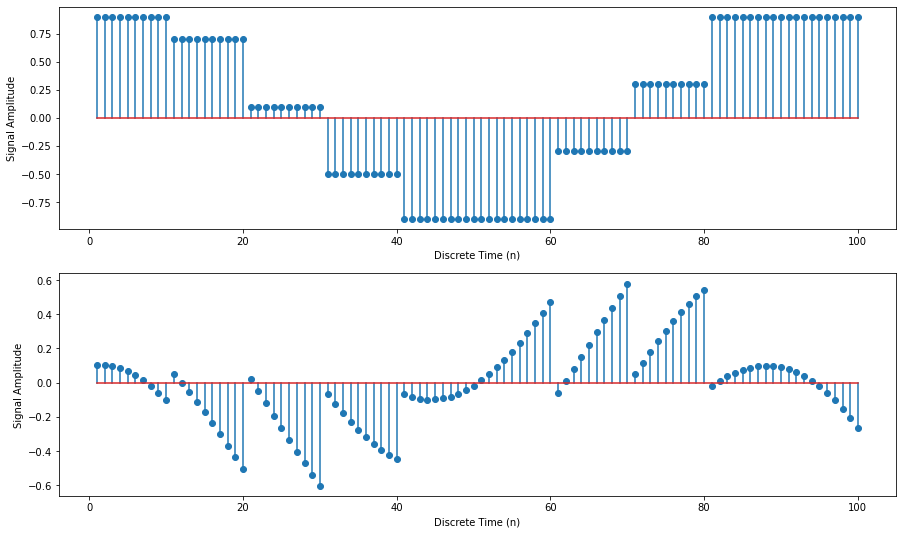

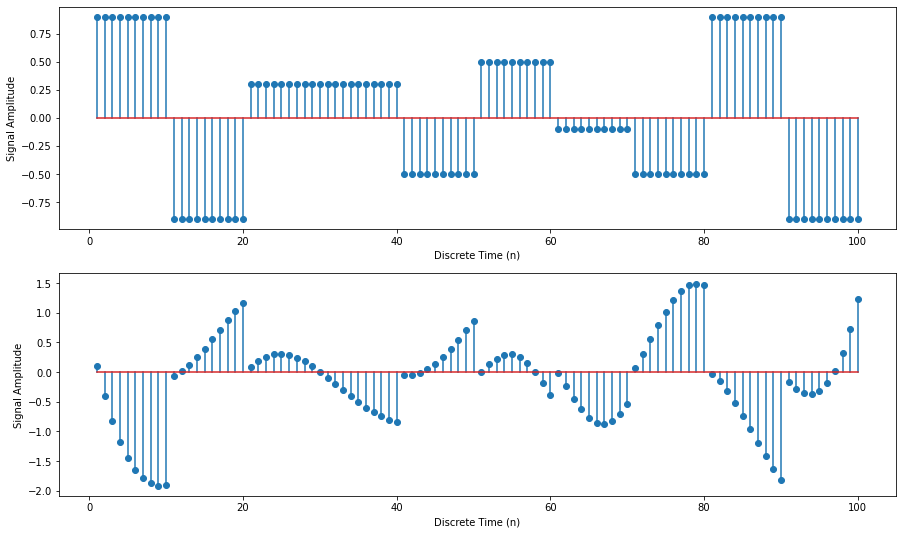

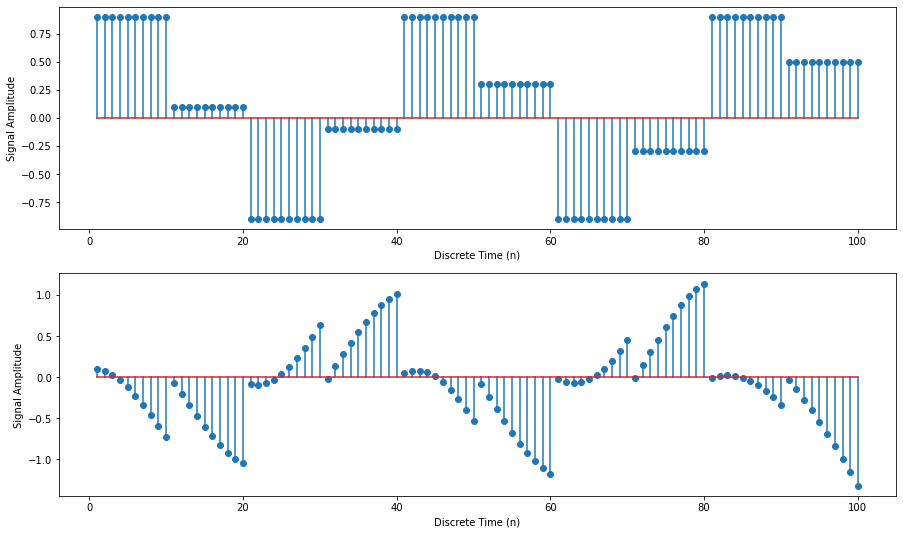

In [9]:
# Question 3

# Create PCM waveform and its corresponding error waveform 50Hz
[ind_150,quantv_150] = quantize(analog_wavefm_150[0::N],[-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8],[-0.9,-0.7,-0.5,-0.3,-0.1,0.1,0.3,0.5,0.7,0.9])
pcm_wavefm_150 = np.reshape(np.ones((N,1))*quantv_150,[1,L], order='F')
pcm_err_wavefm_150 = analog_wavefm_150 - pcm_wavefm_150

# Create PCM waveform and its corresponding error waveform 50Hz
[ind_500,quantv_500] = quantize(analog_wavefm_500[0::N],[-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8],[-0.9,-0.7,-0.5,-0.3,-0.1,0.1,0.3,0.5,0.7,0.9])
pcm_wavefm_500 = np.reshape(np.ones((N,1))*quantv_500,[1,L], order='F')
pcm_err_wavefm_500 = analog_wavefm_500 - pcm_wavefm_500


# Create PCM waveform and its corresponding error waveform 50Hz
[ind_44100,quantv_44100] = quantize(analog_wavefm_44100[0::N],[-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8],[-0.9,-0.7,-0.5,-0.3,-0.1,0.1,0.3,0.5,0.7,0.9])
pcm_wavefm_44100 = np.reshape(np.ones((N,1))*quantv_44100,[1,L], order='F')
pcm_err_wavefm_44100 = analog_wavefm_44100 - pcm_wavefm_44100


# Visualize
plt.figure(figsize=(15, 9))


plt.subplot(211)
plt.stem(np.arange(1,L+1),pcm_wavefm_150.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude');
plt.subplot(212)
plt.stem(np.arange(1,L+1),pcm_err_wavefm_150.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()


# Visualize
plt.figure(figsize=(15, 9))

plt.subplot(211)
plt.stem(np.arange(1,L+1),pcm_wavefm_500.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude');
plt.subplot(212)
plt.stem(np.arange(1,L+1),pcm_err_wavefm_500.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()

# Visualize 44100 Hz Waveform
plt.figure(figsize=(15, 9))

plt.subplot(211)
plt.stem(np.arange(1,L+1),pcm_wavefm_44100.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude');
plt.subplot(212)
plt.stem(np.arange(1,L+1),pcm_err_wavefm_44100.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()

# Question 4: Line Coding

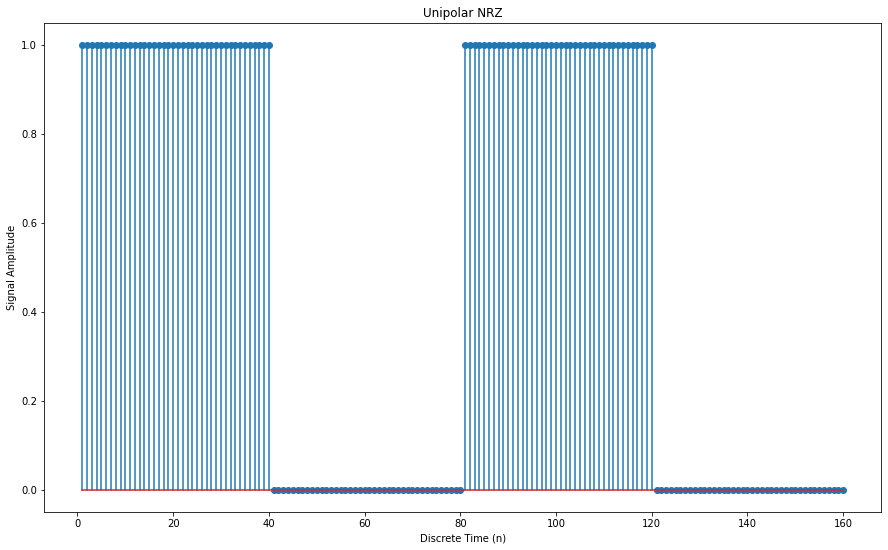

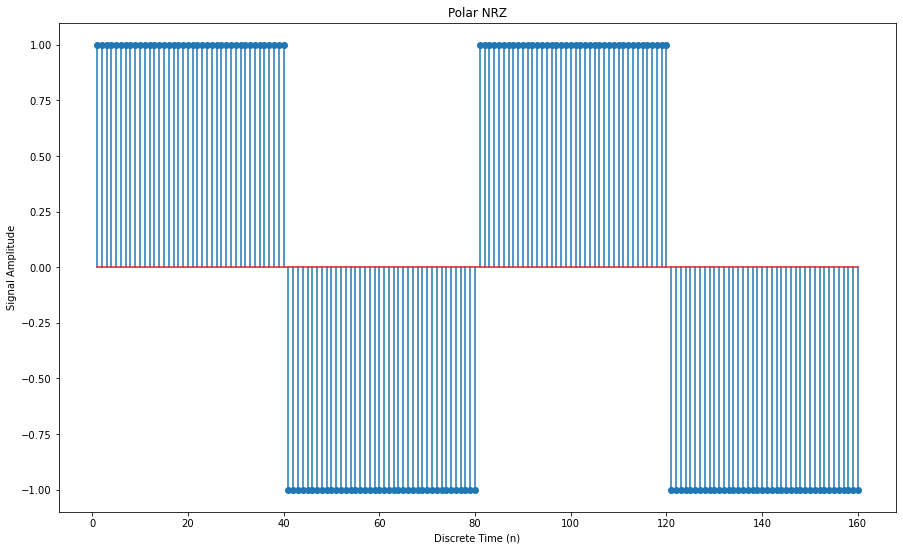

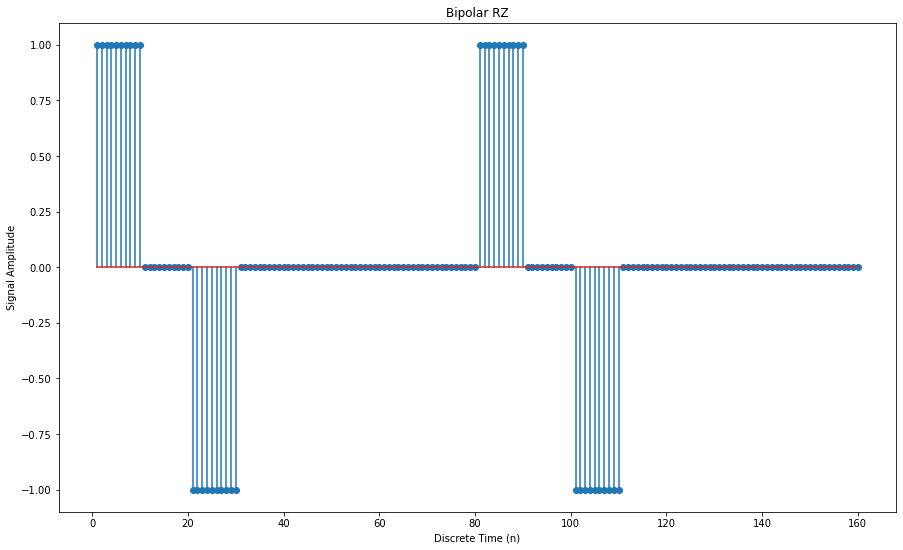

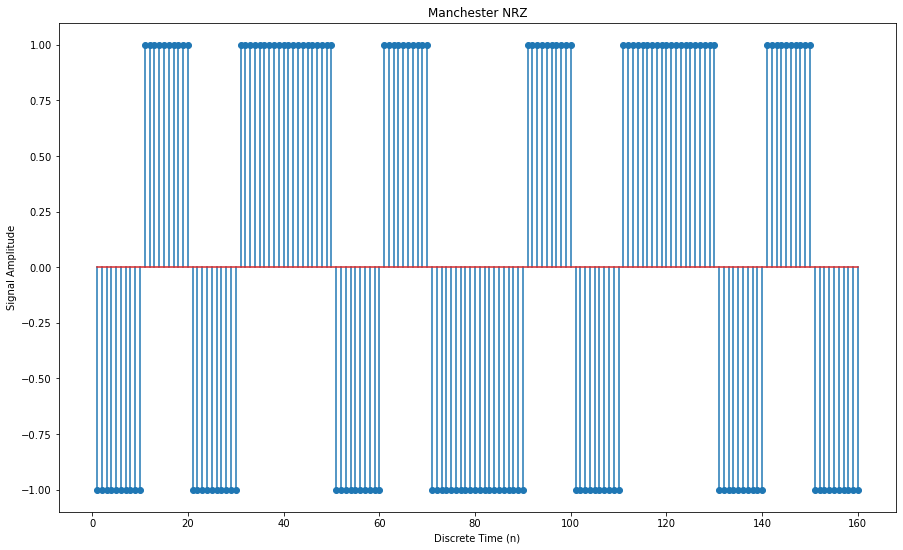

In [10]:
# Question 4

# Generate your own line codes for the binary string `11001100' 
bin_str = [1,1,0,0,1,1,0,0]

# Unipolar NRZ
upnrz1 = np.ones((1,L_lc))
upnrz0 = np.zeros((1,L_lc))
upnrz_wavefm = list()
bpflag = 0

# When the code is 1, flatten ones array
# When the code is 0, flatten zeros array 
for ind in range(0,len(bin_str)):
    if (bin_str[ind] == 1):
        upnrz_wavefm.append(upnrz1.flatten())
    else:
        upnrz_wavefm.append(upnrz0.flatten())


#Polar NRZ
pnrz1 = np.ones((1,L_lc))
pnrz0int = np.ones((1,L_lc))
pnrz0 = np.negative(pnrz0int)
pnrz_wavefm = list()
bpflag = 0

# When code is 1, flatten the ones array
# When code is 0, flatten the negative ones array
for ind in range(0,len(bin_str)):
    if (bin_str[ind] == 1):
        pnrz_wavefm.append(pnrz1.flatten())
    else:
        pnrz_wavefm.append(pnrz0.flatten())


#Bipolar RZ
bprz1 = np.zeros((1,L_lc))
bprz2 = np.zeros((1,L_lc))

# If zero, then set to zero
# If 1, set to 1 unless there is a subsequent 1, which should be set to -1
for i in range(0, len(bprz1[0])):
    if i < len(bprz1[0])/2:
        bprz1[0][i] = 1
for i in range(0, len(bprz2[0])):
    if i < 2*len(bprz2[0])/4:
        bprz2[0][i] = -1
bprz0 = np.zeros((1,L_lc))
bprz_wavefm = list()
bpflag = 0
# Bipolar RZ
for ind in range(0,len(bin_str)):
    if (bin_str[ind] == 1 and bin_str[ind -1] ==1):
        bprz_wavefm.append(bprz2.flatten())
    elif (bin_str[ind] == 1):
        bprz_wavefm.append(bprz1.flatten())
    else:
        bprz_wavefm.append(bprz0.flatten())

# Manchester NRZ
# if 1, 1111, -1-1-1-1
# if 0, -1-1-1-1, 1111
manrz1 = np.ones((1,L_lc))
for i in range(0, len(manrz1[0])):
    if i < len(manrz1[0])/2:
        manrz1[0][i] = -1
manrz0 = np.ones((1,L_lc))
for i in range(0, len(manrz0[0])):
    if len(manrz0[0])/2 <= i < len(manrz0[0]):
        manrz0[0][i] = -1
manrz_wavefm = list()
bpflag = 0

# Manchester NRZ
for ind in range(0,len(bin_str)):
    if (bin_str[ind] == 1):
        manrz_wavefm.append(manrz1.flatten())
    else:
        manrz_wavefm.append(manrz0.flatten())

# Visualize Unipolar NRZ
plt.figure(figsize=(15, 9))
plt.stem(np.arange(1,L_lc*len(bin_str)+1),np.array(upnrz_wavefm).flatten())
plt.title('Unipolar NRZ')
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()

# Visualize Polar NRZ
plt.figure(figsize=(15, 9))
plt.stem(np.arange(1,L_lc*len(bin_str)+1),np.array(pnrz_wavefm).flatten())
plt.title('Polar NRZ')
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()

# Visualize Bipolar RZ
plt.figure(figsize=(15, 9))
plt.stem(np.arange(1,L_lc*len(bin_str)+1),np.array(bprz_wavefm).flatten())
plt.title('Bipolar RZ')
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()

# Visualize Manchester NRZ
plt.figure(figsize=(15, 9))
plt.stem(np.arange(1,L_lc*len(bin_str)+1),np.array(manrz_wavefm).flatten())
plt.title('Manchester NRZ')
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()

# Question 5: Eye Diagrams

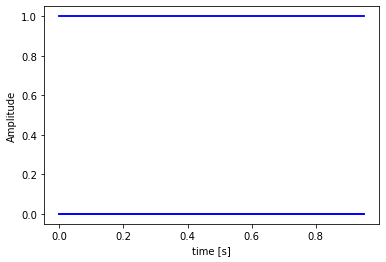

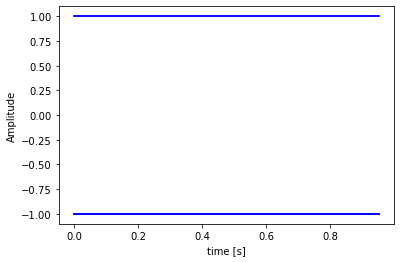

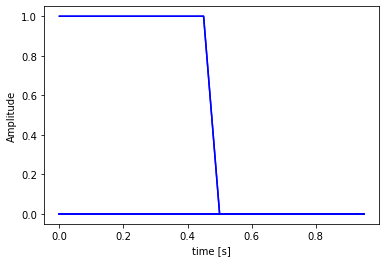

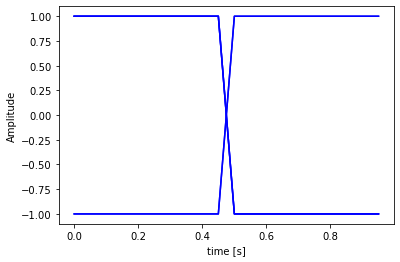

In [11]:
# Question 5

rand_bin_str = np.around(np.random.random((1,L))).flatten()

## Unipolar-waveform
# Flatten ones array if binary code is 1
# Flatten zeros array if binary code is 0
new_upnrz_wavefm = []
for ind in range(0, len(rand_bin_str)):
    if (rand_bin_str[ind] == 1):
        new_upnrz_wavefm.append(upnrz1.flatten())
    else:
        new_upnrz_wavefm.append(upnrz0.flatten())
sig_upnrz = np.array(new_upnrz_wavefm).flatten()
M = 100
N=20
t = np.linspace(0.0, ((N-1)/N), N)

# Plot eye diagram
for p in range(int(M/N)):
    plt.plot(t,sig_upnrz[p*N+np.arange(N)],'b-')
plt.ylabel('Amplitude')
plt.xlabel('time [s]')
plt.show()


## Polar-waveform
# Flatten ones array if binary code is 1
# Flatten zeros array if binary code is 0
new_pnrz_wavefm = []
for ind in range(0, len(rand_bin_str)):
    if (rand_bin_str[ind] == 1):
        new_pnrz_wavefm.append(pnrz1.flatten())
    else:
        new_pnrz_wavefm.append(pnrz0.flatten())
sig_pnrz = np.array(new_pnrz_wavefm).flatten()
M = 100
N=20
t = np.linspace(0.0, ((N-1)/N), N)

# Plot eye diagram
for p in range(int(M/N)):
    plt.plot(t,sig_pnrz[p*N+np.arange(N)],'b-')
plt.ylabel('Amplitude')
plt.xlabel('time [s]')
plt.show()


## Bipolar-waveform
# Flatten ones array if binary code is 1
# Flatten negative ones array if consecutive 1
# Flatten zeros array if binary code is 0
new_bprz_wavefm = []
for ind in range(0, len(rand_bin_str)):
    if (rand_bin_str[ind] == 1 and rand_bin_str[ind -1] ==1):
        new_bprz_wavefm.append(bprz2.flatten())
    elif (rand_bin_str[ind] == 1):
        new_bprz_wavefm.append(bprz1.flatten())
    else:
        new_bprz_wavefm.append(bprz0.flatten())
sig_bprz = np.array(new_bprz_wavefm).flatten()
M = 100
N=20
t = np.linspace(0.0, ((N-1)/N), N)

# Plot eye diagram
for p in range(int(M/N)):
    plt.plot(t,sig_bprz[p*N+np.arange(N)],'b-')
plt.ylabel('Amplitude')
plt.xlabel('time [s]')
plt.show()


# Manchester Waveform
# Flatten ones array if binary code is 1
# Flatten zeros array if binary code is 0
new_manrz_wavefm = []
for ind in range(0, len(rand_bin_str)):
    if (rand_bin_str[ind] == 1):
        new_manrz_wavefm.append(manrz1.flatten())
    else:
        new_manrz_wavefm.append(manrz0.flatten())
sig_manrz = np.array(new_manrz_wavefm).flatten()
M = 100
N=20
t = np.linspace(0.0, ((N-1)/N), N)

# Plot eye diagram
for p in range(int(M/N)):
    plt.plot(t,sig_manrz[p*N+np.arange(N)],'b-')
plt.ylabel('Amplitude')
plt.xlabel('time [s]')
plt.show()

# Question 6: Time Domain Plots 

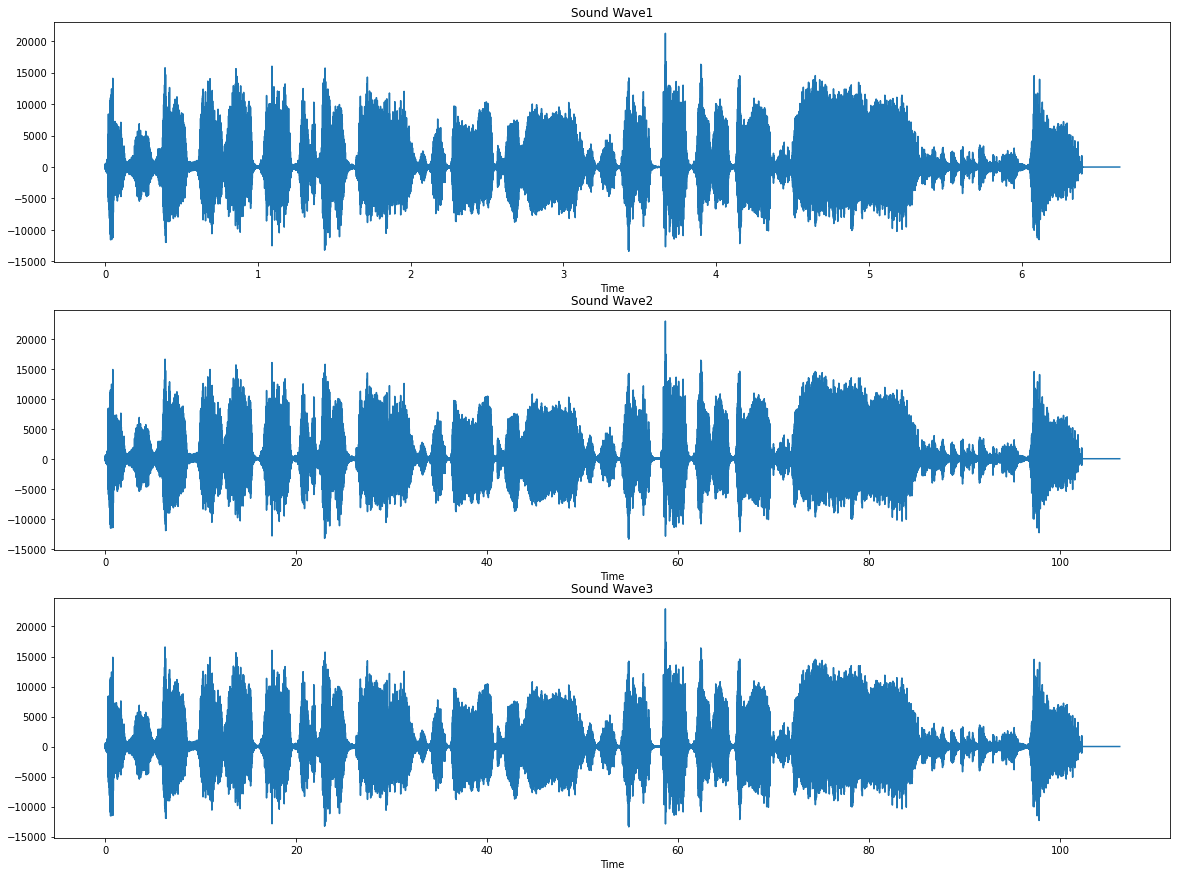

In [12]:

# Question 6
# 
# IT'S FROM SPONGEBOB SQUAREPANTS....
# https://www.youtube.com/watch?v=d1Z8Hz7M04A
#


#import mystery 1 and store as an array using linspace
raw = wave.open("mystery_1.wav")
signal = raw.readframes(-1) 
signal = np.frombuffer(signal, dtype ="int16")  #use this to cast to array
f_rate = raw.getframerate()
time = np.linspace(0, len(signal) / f_rate, num = len(signal))
raw.close()

#import and sample mystery 2
raw2 = wave.open("mystery_2.wav")
signal2 = raw2.readframes(-1)
signal2 = np.frombuffer(signal2, dtype="int16")
f_rate2 = raw2.getframerate()
time2 = np.linspace(0, len(signal2) / f_rate2, num = len(signal2))
raw2.close()


#import and sample mystery 3
raw3 = wave.open("mystery_3.wav")
signal3 = raw3.readframes(-1)
signal3 = np.frombuffer(signal2, dtype="int16")
f_rate3 = raw3.getframerate()
time3 = np.linspace(0, len(signal3) / f_rate3 , num = len(signal3))
raw3.close()


#plot all three signals from linspace time vs signal amplitude, add labels
plt.figure(figsize=(20, 15))
plt.subplot(311)
plt.title("Sound Wave1") 
plt.xlabel("Time") 
plt.plot(time, signal) 

plt.subplot(312)
plt.title("Sound Wave2") 
plt.xlabel("Time") 
plt.plot(time2, signal2) 

plt.subplot(313)
plt.title("Sound Wave3") 
plt.xlabel("Time") 
plt.plot(time3, signal3) 


plt.show()

# Question 7: 10-Bit Quantizer PCM

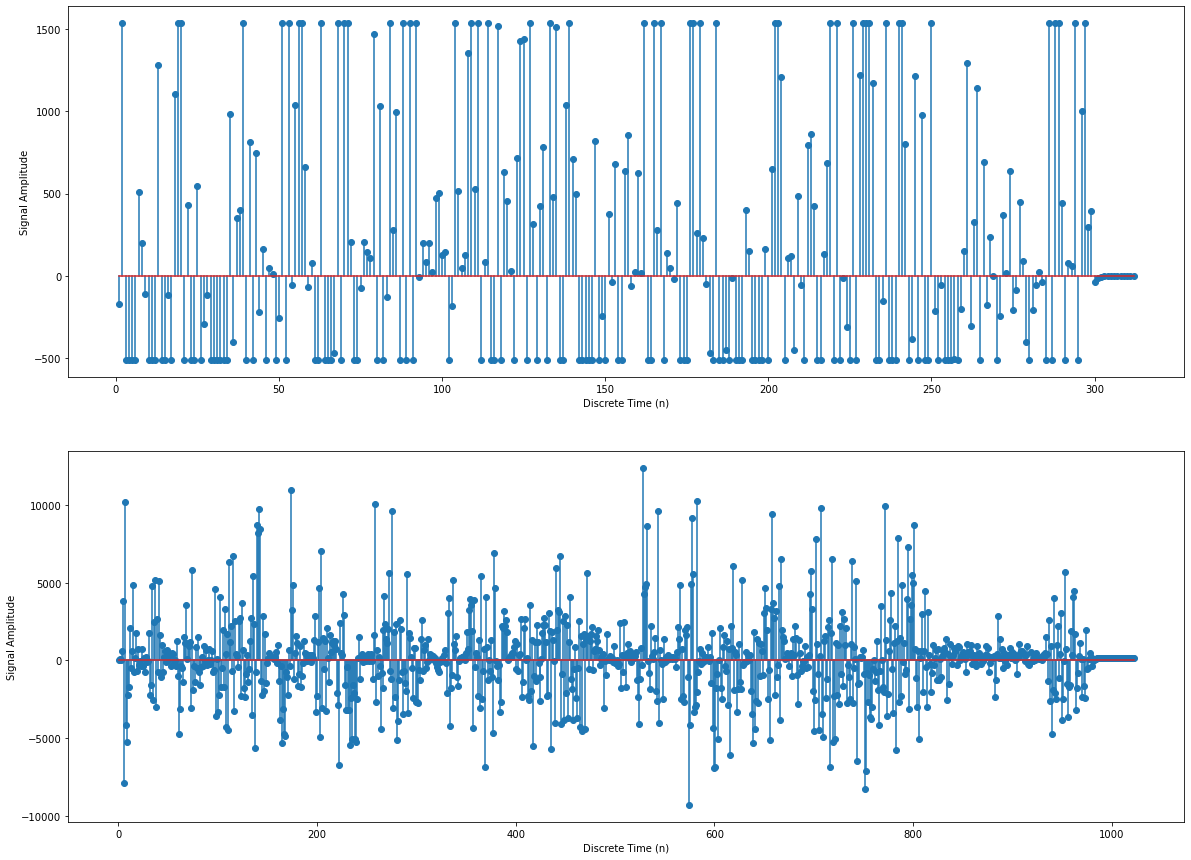

In [13]:
# Question 7

# print(signal)
some = []
some2 = []

# Codebook, this sets the values for each quanta
x = -512
for i in range(1024):
    some.append(x)
    x += 2

# Partition, these exist in between each codebook value and determine voltage
x1 = -513
for i in range(1025):
    some2.append(x1)
    x1 += 2

# quantize the signal from 0 to 1024 samples, skip no values
[ind,quantv] = quantize(signal[0::1024], some, some2)

# reshape the waveform in order to pass 
pcm_wavefm = np.reshape(np.ones((1,1))*quantv,[1,312], order='F')

# take the difference between the signal and the waveform to get error
pcm_err_wavefm = signal[0::312] - pcm_wavefm[0][0::312]

# plot both signals
plt.figure(figsize=(20, 15))

plt.subplot(211)
plt.stem(np.arange(1,313),pcm_wavefm.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.subplot(212)
plt.stem(np.arange(1,1023),pcm_err_wavefm.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()